<a href="https://colab.research.google.com/github/VanTam23/AI/blob/main/NhanDan4LoaiBanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers import Dense,Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
train = ImageDataGenerator(rescale = 1./255,
                           width_shift_range=0.2,
                           rotation_range=40,
                           shear_range=0.2,
                           height_shift_range=0.2,
                           zoom_range=0.2,
                           fill_mode='nearest',
                           horizontal_flip=True)
validation = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_path = '/content/drive/MyDrive/DataBanh/'

In [ ]:
train_data = train.flow_from_directory('/content/drive/MyDrive/DataBanh/Training',
                                       target_size = (150,150),
                                       class_mode = 'categorical')
validation_dataset = train.flow_from_directory('/content/drive/MyDrive/DataBanh/Validation',
                                       target_size = (150,150),
                                       class_mode = 'categorical')


Found 68 images belonging to 4 classes.
Found 12 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding ='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 64)                2

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_data,epochs=20,batch_size=128,validation_data=validation_dataset,verbose=1)

Epoch 1/20
3/3 [==============================] - 19s 3s/step - loss: 8.3741 - accuracy: 0.2500 - val_loss: 4.7638 - val_accuracy: 0.5000
Epoch 2/20
3/3 [==============================] - 1s 320ms/step - loss: 5.2044 - accuracy: 0.4412 - val_loss: 3.5217 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 307ms/step - loss: 3.0380 - accuracy: 0.4706 - val_loss: 1.6770 - val_accuracy: 0.3333
Epoch 4/20
3/3 [==============================] - 1s 322ms/step - loss: 1.4930 - accuracy: 0.4118 - val_loss: 0.9868 - val_accuracy: 0.5000
Epoch 5/20
3/3 [==============================] - 1s 318ms/step - loss: 1.0189 - accuracy: 0.4559 - val_loss: 0.8571 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 1s 289ms/step - loss: 0.8967 - accuracy: 0.6324 - val_loss: 0.8860 - val_accuracy: 0.5833
Epoch 7/20
3/3 [==============================] - 1s 556ms/step - loss: 0.8633 - accuracy: 0.5588 - val_loss: 0.8906 - val_accuracy: 0.6667
Epoch 8/20
3/3 [======

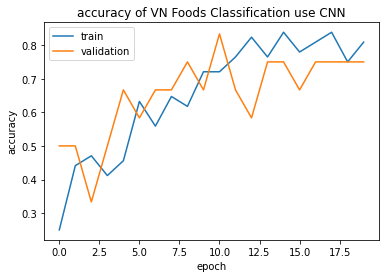

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy of VN Foods Classification use CNN')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

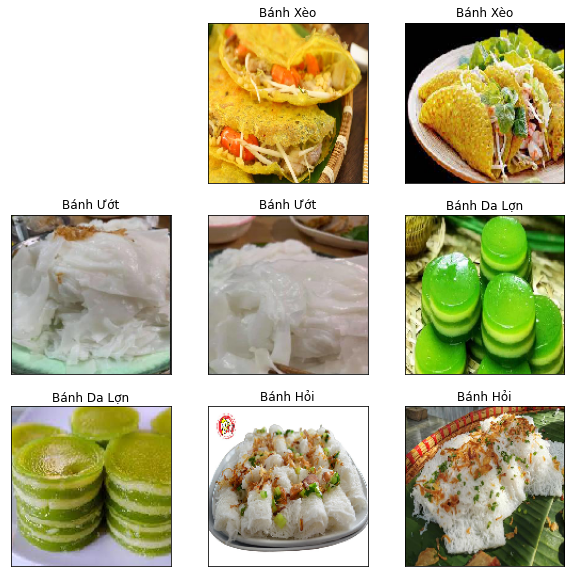

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
names = ['Bánh Da Lợn','Bánh Hỏi','Bánh Ướt','Bánh Xèo' ]
dir = '/content/drive/MyDrive/DataBanh/Testing'
plt.figure(figsize=(10,10))
for i in range(8):
  plt.subplot(3,3,i + 2)
  img = load_img(dir +'/'+ str(i)+'.jpg', target_size=(150,150))
  plt.imshow(img)
  img = img_to_array(img)
  img = img.reshape(1,150,150,3)
  image = img/255.0
  plt.xticks([])
  plt.yticks([])
  plt.title(names[np.argmax(model.predict(image))])